In [1]:
# gpu
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import requests

Instructions for updating:
non-resource variables are not supported in the long term


In [24]:

LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
response = requests.get(LABELS_URL)
labels = response.text.split('\n')[1:-1]
for index in range(100, 250):
    print(f"{index} : {labels[index]}")


100 : black swan
101 : tusker
102 : echidna
103 : platypus
104 : wallaby
105 : koala
106 : wombat
107 : jellyfish
108 : sea anemone
109 : brain coral
110 : flatworm
111 : nematode
112 : conch
113 : snail
114 : slug
115 : sea slug
116 : chiton
117 : chambered nautilus
118 : Dungeness crab
119 : rock crab
120 : fiddler crab
121 : king crab
122 : American lobster
123 : spiny lobster
124 : crayfish
125 : hermit crab
126 : isopod
127 : white stork
128 : black stork
129 : spoonbill
130 : flamingo
131 : little blue heron
132 : American egret
133 : bittern
134 : crane
135 : limpkin
136 : European gallinule
137 : American coot
138 : bustard
139 : ruddy turnstone
140 : red-backed sandpiper
141 : redshank
142 : dowitcher
143 : oystercatcher
144 : pelican
145 : king penguin
146 : albatross
147 : grey whale
148 : killer whale
149 : dugong
150 : sea lion
151 : Chihuahua
152 : Japanese spaniel
153 : Maltese dog
154 : Pekinese
155 : Shih-Tzu
156 : Blenheim spaniel
157 : papillon
158 : toy terrier
159 

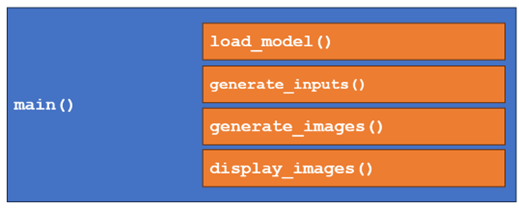

In [9]:
def load_model():
    return hub.KerasLayer('https://tfhub.dev/deepmind/biggan-deep-128/1')

In [22]:
def generate_inputs(batch_size=4, truncation=0.5):
    z = truncation * tf.random.truncated_normal([batch_size, 128])
    y_index = tf.constant([148] * batch_size)
    y = tf.one_hot(y_index, 1000)
    return y, z

In [5]:
def generate_images(module, y, z, truncation=0.5):
    inputs = dict(y=y, z=z, truncation=truncation)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) #This line initializes all the global variables in the TensorFlow graph
        #Initializing them ensures that they have valid values before running any operations.
        images = sess.run(module(inputs)) #This line runs the module on the inputs data and stores the output in the variable images.
    return images

In [6]:
def display_images(images, batch_size=4):
    plt.figure(figsize=(15, 15))
    for i, image in enumerate(images):
        plt.subplot(1, batch_size, i + 1)
        plt.imshow((image + 1) / 2.0)
        plt.axis('off')
    plt.show()


In [7]:
def main():
    module = load_model()
    y, z = generate_inputs()
    images = generate_images(module, y, z)
    display_images(images)

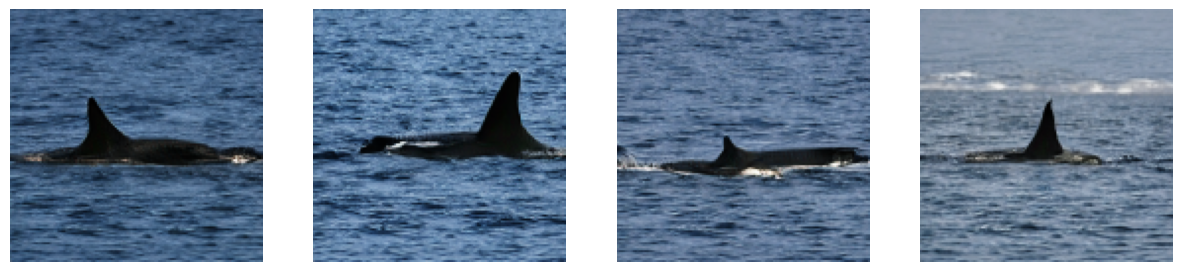

In [23]:
main()